# Multiple Linear Regression

Linear regression is a technique for predicting a real value. Confusingly, these problems where a real value is to be predicted are called regression problems. Linear regression is a technique where a straight line is used to model the relationship between input and output values. In more than two dimensions, this straight line may be thought of as **a plane or hyperplane**.

Predictions are made as a combination of the input values to predict the output value. Each input attribute (x) is weighted using a coefficient (b), and the goal of the learning algorithm is to discover a set of coefficients that results in good predictions (y). Coefficients can be found using **gradient descent**.

In Simple Linear Regression, we used a statistical approach to find the coefficients. Here we will employ an iterative algorithm. Gradient Descent is the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data. The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This process is repeated for a fixed number of iterations.

## Exercise 1 - Explore the Data

After we develop our linear regression algorithm with gradient descent, we will use it to model the wine quality dataset. This dataset is comprised of the details of 4,898 white wines including measurements like acidity and pH. The goal is to use these objective measures to predict the wine quality on a scale between 0 and 10. You can learn more about the dataset on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine = pd.read_csv('winequality-white.csv', sep=';')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
# Normalization
wine = (wine - wine.mean()) / wine.std()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856


## Exercise 2 - Build Multiple Linear Regression 

For more information on the derivation, check out [these videos](https://www.coursera.org/learn/machine-learning/lecture/kCvQc/gradient-descent-for-linear-regression) or [this blog article](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/).

The general steps are:
- Estimate coefficient values for the training data using gradient descent (try [batch, mini-batch or stochastic](http://sebastianruder.com/optimizing-gradient-descent/))
- Evaluate candidate coeffeicient values 
- Tune learning rate and number of epochs
- Make predictions on out-of-sample data

The class or series of functions should do the following:
- Fit a set of X (wine measurements) and y (wine quality value)
- Predict new X based on the coefficients
- Return the coefficients and intercept

In [76]:
# cost function to calculate error
def cost_func(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [77]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = int(theta.ravel().shape[1]) # number of parameters
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j]) # from iteration equation, taking partial derivative
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = cost_func(X, y, theta)

    return theta, cost

## Exercise 3 - Try it out on the Wine Data Set

- Split the data into training and testing sets
- Calculate the appropriate error metric

In [78]:
# add ones column for intercept term
wine.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = wine.shape[1]  
X2 = wine.iloc[:,0:cols-1]  
y2 = wine.iloc[:,cols-1:cols]

# convert to numpy matrices
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  

# initialize theta
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0])) 

In [79]:
# double check dimensions
X2.shape, y2.shape, theta2.shape

((4898, 12), (4898, 1), (1, 12))

In [80]:
# initialize cost at params = 0
cost_func(X2, y2, theta2)

0.49989791751733803

In [81]:
# learning rate and iterations
alpha = 0.01
iters = 10000

In [82]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
cost_func(X2, y2, g2)

0.35904036453978999

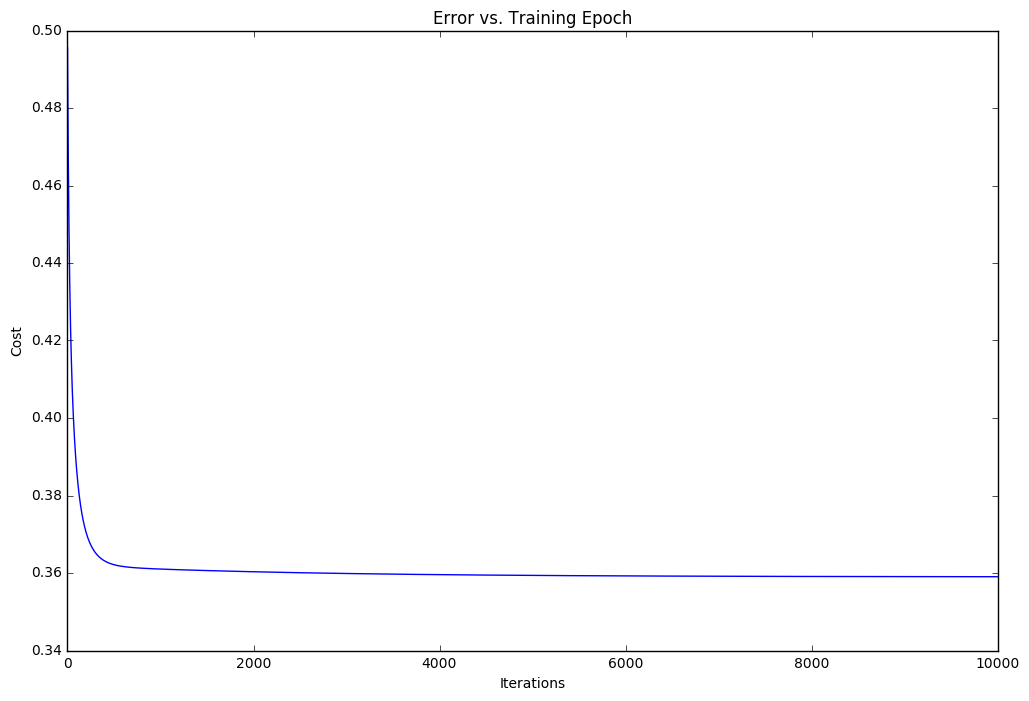

In [83]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

Covergence to minimized cost.

## Exercise 4 - Check via Statsmodels or Scikit-learn

In [84]:
from sklearn.preprocessing import scale
import statsmodels.api as sm

X = scale(wine.drop('quality', axis=1).values)
y = scale(wine['quality'].astype(float).values)

In [85]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sat, 04 Mar 2017   Prob (F-statistic):               0.00
Time:                        11:20:19   Log-Likelihood:                -6139.1
No. Observations:                4898   AIC:                         1.230e+04
Df Residuals:                    4887   BIC:                         1.237e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const               0          0        nan        n

In [86]:
g2

matrix([[  9.81407966e-13,   5.06456576e-02,  -2.13221663e-01,
           2.34978333e-03,   4.32926908e-01,  -7.84748911e-03,
           7.38075959e-02,  -1.61582692e-02,  -4.55257727e-01,
           1.07307191e-01,   7.84958674e-02,   2.93466448e-01]])

Parameters are pretty close to the statsmodel results.

# Additional Optional Exercises

- Proper documentation for class methods and attributes
- Build with NumPy methods and compare computation time
- Try Mini-Batch or SGD
- [Total Error vs. Average Error](http://stats.stackexchange.com/a/155581)
- Type A vs. Type B